# Part 3: Naïve Bayes Modeling

This section covers the development and evaluation of the Naïve Bayes (NB) classifier. We will load the preprocessed data, train the model, and evaluate its performance on both the validation set and the external Yelp evaluation set.

In [29]:
import pickle

# Load the preprocessed data
with open('tfidf_data_advanced.pkl', 'rb') as f:
    final_data = pickle.load(f)

# Unpack the data into variables for easy use
X_train_tfidf = final_data['X_train_tfidf']
y_train = final_data['y_train']
X_val_tfidf = final_data['X_val_tfidf']
y_val = final_data['y_val']
X_eval_tfidf = final_data['X_eval_tfidf']
y_eval = final_data['y_eval']
vectorizer = final_data['vectorizer']

print("Data loaded successfully!")
print("Shape of training data:", X_train_tfidf.shape)

Data loaded successfully!
Shape of training data: (7500, 5000)


### 3.1 Model Training

We use the `MultinomialNB` classifier from scikit-learn, which is well-suited for text classification tasks with TF-IDF features. The model is trained on the TF-IDF matrix of the training dataset. We use the default parameter `alpha=1.0` for Laplace smoothing, as it is a robust choice that prevents zero-probability issues.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize the Naïve Bayes model
nb_model = MultinomialNB()
# Train the model on the training data
print("Training the Naïve Bayes model...")
nb_model.fit(X_train_tfidf, y_train)
print("Training complete.")

Training the Naïve Bayes model...
Training complete.


### 3.2 Evaluation on the Validation Set

After training, we first evaluate the model's performance on the validation set. This provides a baseline understanding of how well the model has learned to classify sentiment on data it has not seen during training.

**Results:**
The Naïve Bayes model achieved an **accuracy of 83.72%** and an **F1-score of 83.67%** on the validation set. The classification report shows balanced precision and recall for both positive and negative classes, which is expected given our balanced dataset. The confusion matrix confirms that the model performs similarly well in identifying both sentiments.


Evaluating on the validation set...
Validation Accuracy: 0.8372
Validation F1-Score: 0.8362

Classification Report (Validation Set):
              precision    recall  f1-score   support

    Negative       0.83      0.84      0.84      1252
    Positive       0.84      0.83      0.84      1248

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



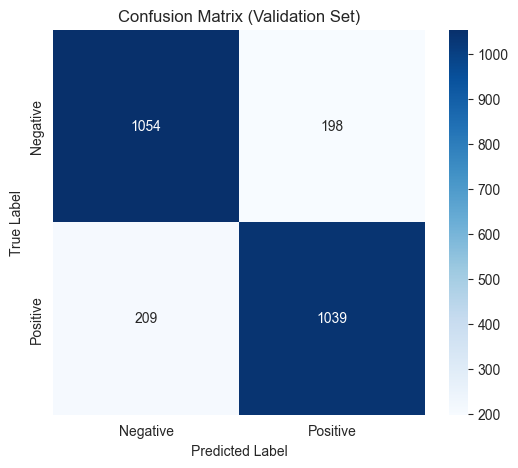

In [31]:
# Make predictions on the validation set
print("\nEvaluating on the validation set...")
y_val_pred = nb_model.predict(X_val_tfidf)

# Calculate and print performance metrics
accuracy_val = accuracy_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Validation F1-Score: {f1_val:.4f}")

# Print a detailed classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=['Negative', 'Positive']))

# Generate and plot the confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

### 3.3 Evaluation on the Yelp Dataset (Generalization Test)

To test the model's ability to generalize to a different domain, we apply it to the Yelp review dataset. This is a critical step to understand if our model, trained on general product and movie reviews, can perform well on restaurant and service reviews.

**Results:**
On the Yelp dataset, the model's performance saw a slight drop, achieving an **accuracy of 82.76%** and an **F1-score of 82.54%**. This minor decrease is expected when applying a model to a new data distribution. However, the performance remains strong, indicating that the model has learned general sentiment features that are not strictly limited to the training domain. The model shows good generalization capabilities.


Evaluating on the Yelp evaluation set...
Yelp Evaluation Accuracy: 0.8270
Yelp Evaluation F1-Score: 0.8253

Classification Report (Yelp Evaluation Set):
              precision    recall  f1-score   support

    Negative       0.81      0.84      0.83      2482
    Positive       0.84      0.81      0.83      2518

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



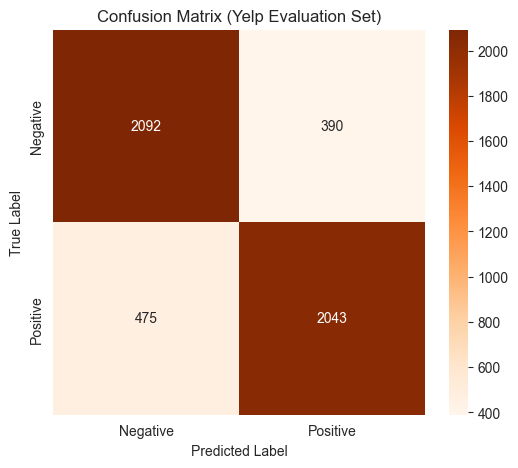

In [32]:
# Make predictions on the Yelp evaluation set
print("\nEvaluating on the Yelp evaluation set...")
y_eval_pred = nb_model.predict(X_eval_tfidf)

# Calculate and print performance metrics
accuracy_eval = accuracy_score(y_eval, y_eval_pred)
f1_eval = f1_score(y_eval, y_eval_pred)

print(f"Yelp Evaluation Accuracy: {accuracy_eval:.4f}")
print(f"Yelp Evaluation F1-Score: {f1_eval:.4f}")

# Print a detailed classification report
print("\nClassification Report (Yelp Evaluation Set):")
print(classification_report(y_eval, y_eval_pred, target_names=['Negative', 'Positive']))

# Generate and plot the confusion matrix for the Yelp set
cm_eval = confusion_matrix(y_eval, y_eval_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Yelp Evaluation Set)')
plt.show()

# Part 4: SVM Modeling

We use **LinearSVC** from scikit-learn, which is well-suited for high-dimensional and sparse data such as TF-IDF vectors.  We start with the default regularization parameter `C=1.0`, and we will later tune this parameter based on validation set performance.


In [33]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM model (C=1.0 is default)
svm_model = LinearSVC(C=1.0, max_iter=5000)


# 4.1 SVM Model Training

In [34]:

# Train the SVM model
print("Training the SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Training complete.")


Training the SVM model...
Training complete.


# 4.2 Hyperparameter Tuning
We experiment with different values of the regularization parameter `C`  (e.g., 0.1, 1.0, 10.0) on the validation set.  This allows us to select the value of `C` that maximizes the model's performance (measured by F1-score)  and prevents overfitting or underfitting.

In [35]:
# Simple hyperparameter tuning for C
C_values = [0.01, 0.1, 1.0, 10.0]
results = []

print("Hyperparameter tuning on validation set...")
for c in C_values:
    model = LinearSVC(C=c, max_iter=5000)
    model.fit(X_train_tfidf, y_train)
    y_val_pred = model.predict(X_val_tfidf)
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    results.append((c, acc, f1))
    print(f"C={c}: Validation Accuracy={acc:.4f}, F1={f1:.4f}")

# Pick the best C value based on F1-score
best_c = max(results, key=lambda x: x[2])[0]
print(f"\nBest C selected based on F1: {best_c}")
svm_model = LinearSVC(C=best_c, max_iter=5000).fit(X_train_tfidf, y_train)


Hyperparameter tuning on validation set...
C=0.01: Validation Accuracy=0.8240, F1=0.8161
C=0.1: Validation Accuracy=0.8428, F1=0.8397
C=1.0: Validation Accuracy=0.8308, F1=0.8292
C=10.0: Validation Accuracy=0.7952, F1=0.7935

Best C selected based on F1: 0.1


# 4.3 Evaluation on the Validation Set
We evaluate the SVM model on the validation set using **Accuracy** and **F1-score**.  
The F1-score is chosen because it balances Precision and Recall,  
which is important for imbalanced datasets (even though our dataset is nearly balanced).  
We also visualize the confusion matrix to better understand the classification results.



Evaluating the SVM model on the validation set...
Validation Accuracy (SVM): 0.8428
Validation F1-Score (SVM): 0.8397

Classification Report (Validation Set - SVM):
              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85      1252
    Positive       0.86      0.82      0.84      1248

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



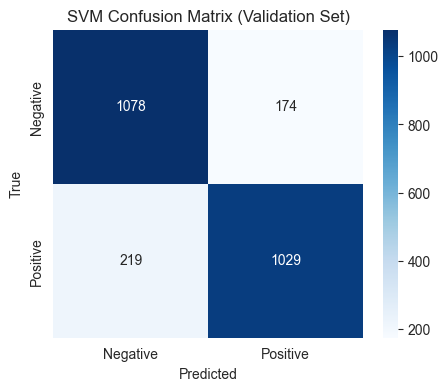

In [36]:
# Evaluate on validation set
print("\nEvaluating the SVM model on the validation set...")
y_val_pred_svm = svm_model.predict(X_val_tfidf)

accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
f1_val_svm = f1_score(y_val, y_val_pred_svm)

print(f"Validation Accuracy (SVM): {accuracy_val_svm:.4f}")
print(f"Validation F1-Score (SVM): {f1_val_svm:.4f}")

print("\nClassification Report (Validation Set - SVM):")
print(classification_report(y_val, y_val_pred_svm, target_names=["Negative", "Positive"]))

cm_val_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_val_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix (Validation Set)")
plt.show()


# 4.4 Evaluation on the Yelp Dataset (Generalization Test)


Evaluating the SVM model on the Yelp evaluation set...
Yelp Evaluation Accuracy (SVM): 0.8298
Yelp Evaluation F1-Score (SVM): 0.8334

Classification Report (Yelp Evaluation Set - SVM):
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.83      2482
    Positive       0.82      0.85      0.83      2518

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



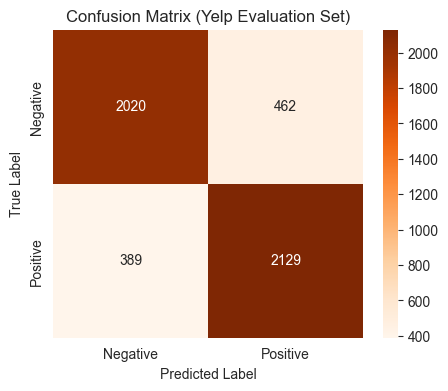

In [37]:
# Evaluate on Yelp evaluation set
print("\nEvaluating the SVM model on the Yelp evaluation set...")
y_eval_pred_svm = svm_model.predict(X_eval_tfidf)

accuracy_eval_svm = accuracy_score(y_eval, y_eval_pred_svm)
f1_eval_svm = f1_score(y_eval, y_eval_pred_svm)

print(f"Yelp Evaluation Accuracy (SVM): {accuracy_eval_svm:.4f}")
print(f"Yelp Evaluation F1-Score (SVM): {f1_eval_svm:.4f}")

print("\nClassification Report (Yelp Evaluation Set - SVM):")
print(classification_report(y_eval, y_eval_pred_svm, target_names=["Negative", "Positive"]))

# --- Confusion Matrix Visualization ---
cm_eval_svm = confusion_matrix(y_eval, y_eval_pred_svm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_eval_svm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Yelp Evaluation Set)")
plt.show()

# Part 5: BERT Modeling

In [38]:
%pip install --upgrade transformers datasets accelerate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import transformers
print(transformers.__version__)

4.56.1


In [40]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

for pkg in ['stopwords', 'wordnet', 'averaged_perceptron_tagger']:
    try:
        nltk.data.find(f'corpora/{pkg}' if pkg in ['stopwords', 'wordnet'] else f'taggers/{pkg}')
    except LookupError:
        nltk.download(pkg)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>|http\S+|www\.\S+|[@#]\w+|[^a-z\s]', ' ', text)
    words = text.split()
    if not words:
        return ""
    pos_tags = nltk.pos_tag(words)
    lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return " ".join([w for w in lemmas if w not in stop_words])

print("Loading raw data...")
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")
eval_df  = pd.read_csv("evaluation.csv")

print("Cleaning text data...")
train_df["text"] = train_df["text"].fillna("").apply(preprocess_text)
test_df["text"]  = test_df["text"].fillna("").apply(preprocess_text)
eval_df["text"]  = eval_df["text"].fillna("").apply(preprocess_text)


train_df["score"] = train_df["score"].astype(int)
test_df["score"]  = test_df["score"].astype(int)
eval_df["score"]  = eval_df["score"].astype(int)

print("Data ready:", train_df.shape, test_df.shape, eval_df.shape)

# HuggingFace Dataset
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df[['text', 'score']].rename(columns={"score": "labels"}))
val_ds   = Dataset.from_pandas(test_df[['text', 'score']].rename(columns={"score": "labels"}))
eval_ds  = Dataset.from_pandas(eval_df[['text', 'score']].rename(columns={"score": "labels"}))

# Tokenizer
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_fn(batch):
    return tokenizer(batch['text'], truncation=True, padding='max_length', max_length=128)

train_ds = train_ds.map(tokenize_fn, batched=True, remove_columns=['text'])
val_ds   = val_ds.map(tokenize_fn, batched=True, remove_columns=['text'])
eval_ds  = eval_ds.map(tokenize_fn, batched=True, remove_columns=['text'])

train_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
eval_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Loading raw data...


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crzuu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning text data...
Data ready: (7500, 2) (2500, 2) (5000, 2)


Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [41]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current device:", torch.cuda.get_device_name(0))

CUDA available: True
CUDA device count: 1
Current device: NVIDIA GeForce RTX 4060 Laptop GPU


In [43]:
# 4. Modeling
import torch
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model = model.to(device)

_base = dict(
    output_dir="./bert_results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=2, 
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_dir="./logs"
)

try:
    training_args = TrainingArguments(**_base, fp16=torch.cuda.is_available())
except TypeError:
    training_args = TrainingArguments(**_base)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, preds), "f1": f1_score(labels, preds)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 5. Training BERT and Evaluating
trainer.train()

print("\nValidation results:")
val_metrics = trainer.evaluate(eval_dataset=val_ds)
print(val_metrics)

print("\nEvaluation set results:")
eval_metrics = trainer.evaluate(eval_dataset=eval_ds)
print(eval_metrics)


Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\crzuu\AppData\Local\Temp\ipykernel_13404\82839967.py:37: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.405300



Validation results:


{'eval_loss': 0.35265761613845825, 'eval_accuracy': 0.8696, 'eval_f1': 0.8690763052208835, 'eval_runtime': 1.6748, 'eval_samples_per_second': 1492.726, 'eval_steps_per_second': 47.17, 'epoch': 2.0}

Evaluation set results:
{'eval_loss': 0.3601657748222351, 'eval_accuracy': 0.86, 'eval_f1': 0.8657460682777138, 'eval_runtime': 3.5792, 'eval_samples_per_second': 1396.955, 'eval_steps_per_second': 43.864, 'epoch': 2.0}



Evaluating on the validation set...
Validation Accuracy: 0.8696
Validation F1-Score: 0.8691

Classification Report (Validation Set):
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      1252
    Positive       0.87      0.87      0.87      1248

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500



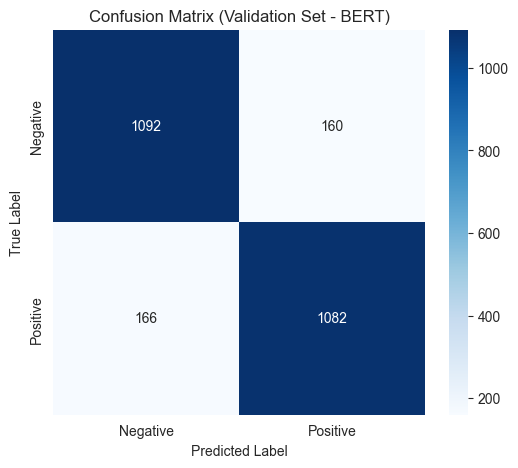


Evaluating on the evaluation set...


Evaluation Accuracy: 0.8600
Evaluation F1-Score: 0.8657

Classification Report (Evaluation Set):
              precision    recall  f1-score   support

    Negative       0.89      0.82      0.85      2482
    Positive       0.84      0.90      0.87      2518

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



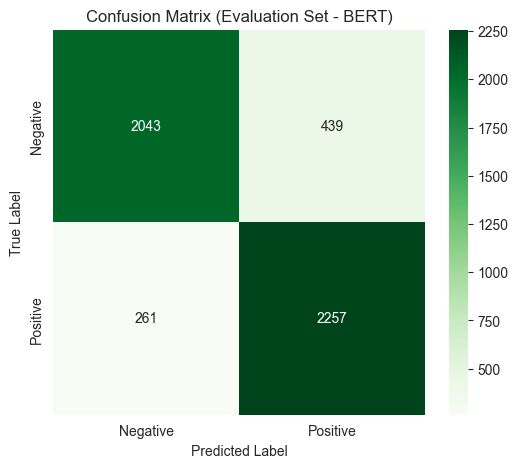

In [44]:
# 6. Predict

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\nEvaluating on the validation set...")
val_preds = trainer.predict(val_ds)
y_val_pred = np.argmax(val_preds.predictions, axis=1)
y_val_true = val_preds.label_ids

val_acc = accuracy_score(y_val_true, y_val_pred)
val_f1  = f1_score(y_val_true, y_val_pred)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation F1-Score: {val_f1:.4f}")

print("\nClassification Report (Validation Set):")
print(classification_report(y_val_true, y_val_pred, target_names=["Negative","Positive"]))

cm_val = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set - BERT)")
plt.show()

print("\nEvaluating on the evaluation set...")
eval_preds = trainer.predict(eval_ds)
y_eval_pred = np.argmax(eval_preds.predictions, axis=1)
y_eval_true = eval_preds.label_ids

eval_acc = accuracy_score(y_eval_true, y_eval_pred)
eval_f1  = f1_score(y_eval_true, y_eval_pred)

print(f"Evaluation Accuracy: {eval_acc:.4f}")
print(f"Evaluation F1-Score: {eval_f1:.4f}")

print("\nClassification Report (Evaluation Set):")
print(classification_report(y_eval_true, y_eval_pred, target_names=["Negative","Positive"]))

cm_eval = confusion_matrix(y_eval_true, y_eval_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_eval, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Negative","Positive"],
            yticklabels=["Negative","Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Evaluation Set - BERT)")
plt.show()
